### Desarga de los datos

Base de datos:

Nakayama, L. F., Goncalves, M., Zago Ribeiro, L., Santos, H., Ferraz, D., Malerbi, F., Celi, L. A., & Regatieri, C. (2023). A Brazilian Multilabel Ophthalmological Dataset (BRSET) (version 1.0.0). PhysioNet. https://doi.org/10.13026/xcxw-8198.
No se usó toda la base de datos, se trabajó con máximo 50 imágenes de 5 clases

In [ ]:
!wget -r -N -c -np --user arelisy --ask-password https://physionet.org/files/brazilian-ophthalmological/1.0.0/

### Visualización de carcaterísticas

In [ ]:
########
import pandas as pd

metadata_path = '/content/physionet.org/files/brazilian-ophthalmological/1.0.0/labels.csv'
metadata = pd.read_csv(metadata_path)
print(metadata.head().to_string(index=False))


image_id  patient_id   camera  patient_age comorbidities diabetes_time_y insuline  patient_sex  exam_eye diabetes nationality optic_disc  vessels  macula  DR_SDRG  DR_ICDR  focus  iluminaton  image_field  artifacts  diabetic_retinopathy  macular_edema  scar  nevus  amd  vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  retinal_detachment  myopic_fundus  increased_cup_disc  other  quality
img00001           1 Canon CR         48.0     diabetes1              12      yes            1         1      yes      Brazil          1        1       1        0        0      1           1            1          1                     0              0     0      0    0                   0                         0        0           0                   0              0                   1      0 Adequate
img00002           1 Canon CR         48.0     diabetes1              12      yes            1         2      yes      Brazil          2        1       1        0        0      1      

In [ ]:
print(metadata.describe())
print(metadata.columns)

         patient_id   patient_age   patient_sex      exam_eye       vessels  \
count  16266.000000  10821.000000  16266.000000  16266.000000  16266.000000   
mean    4275.474302     57.655947      1.617976      1.498647      1.049613   
std     2463.584452     18.260156      0.485897      0.500014      0.217150   
min        1.000000      5.000000      1.000000      1.000000      1.000000   
25%     2158.250000     47.000000      1.000000      1.000000      1.000000   
50%     4270.000000     61.000000      2.000000      1.000000      1.000000   
75%     6420.750000     71.000000      2.000000      2.000000      1.000000   
max     8524.000000     97.000000      2.000000      2.000000      2.000000   

             macula       DR_SDRG       DR_ICDR         focus    iluminaton  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.288024      0.180868      0.180007      1.033321      1.005164   
std        0.452856      0.750198      0.739261    

In [ ]:
# Lista de columnas de diagnóstico
diagnostics_columns = [
    'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
    'vascular_occlusion', 'hypertensive_retinopathy', 'drusens', 'hemorrhage',
    'retinal_detachment', 'myopic_fundus', 'increased_cup_disc', 'other'
]


diagnostics_counts = metadata[diagnostics_columns].apply(pd.Series.value_counts).fillna(0)
present_counts = diagnostics_counts.loc[1]
print(present_counts)



diabetic_retinopathy        1046
macular_edema                402
scar                         290
nevus                        134
amd                          366
vascular_occlusion           103
hypertensive_retinopathy     283
drusens                     2807
hemorrhage                    96
retinal_detachment             7
myopic_fundus                268
increased_cup_disc          3202
other                        758
Name: 1, dtype: int64


Solo las primeras 1000 imágenes

In [ ]:
import pandas as pd


metadata_path = '/content/physionet.org/files/brazilian-ophthalmological/1.0.0/labels.csv'  # Actualiza la ruta al archivo
metadata = pd.read_csv(metadata_path)
metadata_subset = metadata.head(1000)

print(metadata_subset.head())


   image_id  patient_id    camera  patient_age comorbidities diabetes_time_y  \
0  img00001           1  Canon CR         48.0     diabetes1              12   
1  img00002           1  Canon CR         48.0     diabetes1              12   
2  img00003           2  Canon CR         18.0     diabetes1               7   
3  img00004           2  Canon CR         18.0     diabetes1               7   
4  img00005           3  Canon CR         22.0     diabetes1              11   

  insuline  patient_sex  exam_eye diabetes  ... amd vascular_occlusion  \
0      yes            1         1      yes  ...   0                  0   
1      yes            1         2      yes  ...   0                  0   
2      yes            2         1      yes  ...   0                  0   
3      yes            2         2      yes  ...   0                  0   
4      yes            1         1      yes  ...   0                  0   

   hypertensive_retinopathy  drusens  hemorrhage  retinal_detachment  \
0 

In [ ]:
# Lista de columnas de diagnóstico
diagnostics_columns = [
    'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
    'vascular_occlusion', 'hypertensive_retinopathy', 'drusens', 'hemorrhage',
    'retinal_detachment', 'myopic_fundus', 'increased_cup_disc', 'other'
]


diagnostics_counts_subset = metadata_subset[diagnostics_columns].apply(pd.Series.value_counts).fillna(0)
present_counts_subset = diagnostics_counts_subset.loc[1]
print(present_counts_subset)


diabetic_retinopathy         99
macular_edema                32
scar                         22
nevus                        10
amd                          26
vascular_occlusion            4
hypertensive_retinopathy     43
drusens                     163
hemorrhage                    4
retinal_detachment            1
myopic_fundus                17
increased_cup_disc          170
other                        39
Name: 1, dtype: int64


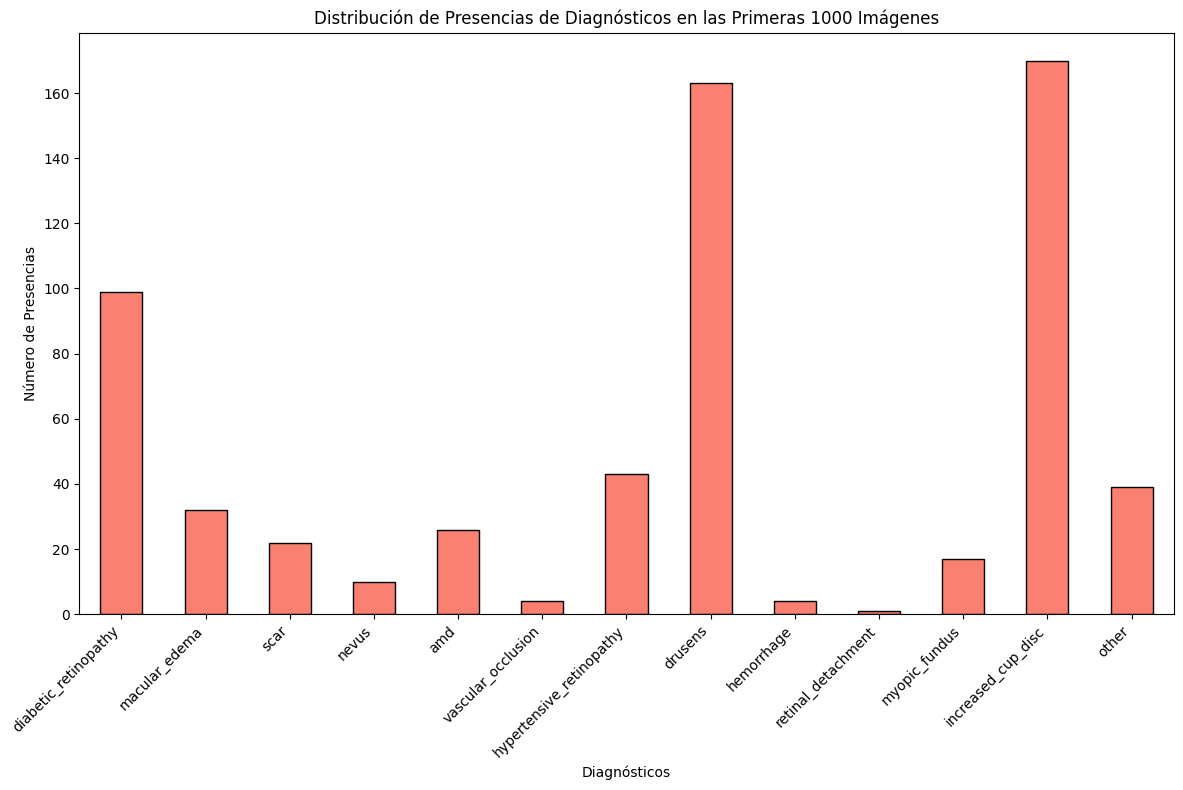

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
present_counts_subset.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Distribución de Presencias de Diagnósticos en las Primeras 1000 Imágenes')
plt.xlabel('Diagnósticos')
plt.ylabel('Número de Presencias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Modelos

### ....

Epoch 1/60
4/4 [==============================] - 10s 2s/step - loss: 368.4785 - accuracy: 0.8417 - val_loss: 326.4787 - val_accuracy: 0.0667
Epoch 2/60
4/4 [==============================] - 8s 2s/step - loss: 531.8459 - accuracy: 0.0250 - val_loss: 186.6613 - val_accuracy: 0.0667
Epoch 3/60
4/4 [==============================] - 9s 3s/step - loss: 129.8683 - accuracy: 0.7083 - val_loss: 96.3204 - val_accuracy: 0.9333
Epoch 4/60
4/4 [==============================] - 7s 2s/step - loss: 93.1230 - accuracy: 0.9667 - val_loss: 132.6529 - val_accuracy: 0.9333
Epoch 5/60
4/4 [==============================] - 10s 3s/step - loss: 81.0320 - accuracy: 0.9667 - val_loss: 127.8008 - val_accuracy: 0.9333
Epoch 6/60
4/4 [==============================] - 8s 2s/step - loss: 62.6707 - accuracy: 0.9583 - val_loss: 69.3463 - val_accuracy: 0.9000
Epoch 7/60
4/4 [==============================] - 8s 2s/step - loss: 45.1619 - accuracy: 0.9083 - val_loss: 24.4563 - val_accuracy: 0.9333
Epoch 8/60
4/4 [==

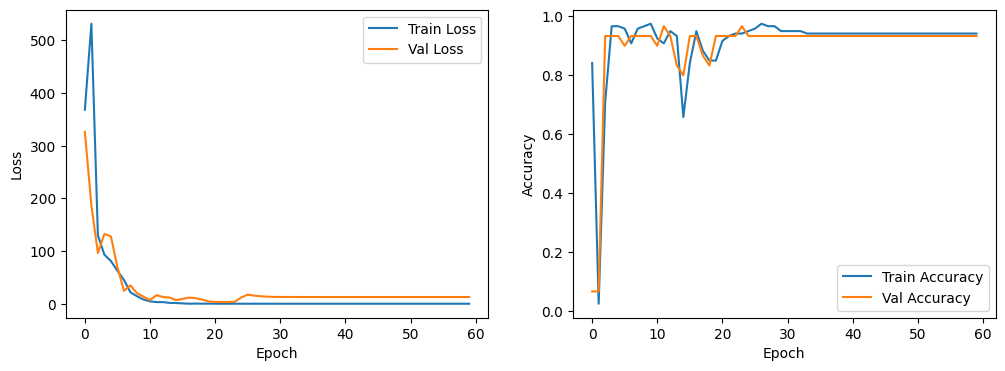

1/1 [==============================] - 1s 753ms/step - loss: 12.7156 - accuracy: 0.9333
Validation Loss: 12.715556144714355, Validation Accuracy: 0.9333333373069763


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

images_dir = '/content/physionet.org/files/brazilian-ophthalmological/1.0.0/fundus_photos'
labels_csv = '/content/physionet.org/files/brazilian-ophthalmological/1.0.0/labels.csv'


labels_df = pd.read_csv(labels_csv)

classification_columns = [
    'diabetic_retinopathy', 'drusens', 'increased_cup_disc',
]

labels_df = labels_df[['image_id'] + classification_columns].dropna()

def load_images_and_labels(labels_df, images_dir, img_height, img_width, limit_per_class=50):
    images = []
    labels = []
    for index, row in labels_df.iterrows():
        img_path = os.path.join(images_dir, row['image_id'] + '.jpg')
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row[classification_columns].values.astype('float32'))
        if len(labels) >= limit_per_class * len(classification_columns):
            break
    return np.array(images).astype('float32'), np.array(labels)

img_height, img_width = 224, 224
images, labels = load_images_and_labels(labels_df, images_dir, img_height, img_width)


X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = labels.shape[1]

# Modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Primera capa oculta
model.add(layers.Dense(64, activation='relu'))  # Segunda capa oculta
model.add(layers.Dense(num_classes, activation='sigmoid'))  # Tercera capa oculta (salida)


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val))


import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


In [ ]:
print("")